# LSTMs test

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
import os
%load_ext autoreload
%autoreload 1


#os.chdir(".\\lib")
print(os.getcwd())

import models, ingest, predict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\perso\Documents\GitHub\Hysterisis-ML-Modeling\lib


In [178]:

## FLAGS ##
# RAS model output or USGS
USGS_FLAG = True

csv = r"..\data\henry_csv_17-23.csv"
renames = {'00065': 'Gage Height', '00060': 'Discharge', '72254': 'Velocity'}

train_scaled, test_scaled, train_dates, test_dates, all_dates = ingest.ingest(csv, renames= renames, USGS_FLAG=USGS_FLAG,
                                                                               train_range= train_range, test_range= test_range)
trainX, trainY = ingest.reshape(train_scaled, timestep_type= "hr")
testX, testY = ingest.reshape(test_scaled, timestep_type= "hr")


In [184]:
csv = "..\\data\\USGS_WS_2017_2023.csv"
renames = {"Peoria date" : "datetime"}
target = "Flow"
data_name = "USGS_WS_2017_2023"

df = pd.read_csv(csv, low_memory=False)
df = df.rename(columns= renames)

df = df.set_index('datetime')
all_dates = df.index.to_series()

train_range, test_range = [all_dates[0], all_dates[-1]]


,Peoria_WL,Henry_WL,Flow,Vel,Slope,Unnamed: 6
datetime,,,,,,
1/1/17 6:00,440.91,442.800,20400.0,2.45,1.022727e-05,NaN
1/2/17 6:00,440.71,442.490,18100.0,2.22,9.632035e-06,NaN
1/3/17 6:00,440.40,442.150,16400.0,2.06,9.469697e-06,NaN
1/4/17 6:00,440.13,441.970,16200.0,2.07,9.956710e-06,NaN
1/5/17 6:00,439.69,441.890,18500.0,2.40,1.190476e-05,NaN
...,...,...,...,...,...,...
11/26/22 6:00,439.78,440.050,3670.0,0.51,1.461039e-06,NaN
11/27/22 6:00,440.19,440.200,5930.0,0.83,5.411255e-08,NaN
11/28/22 6:00,439.99,440.220,5380.0,0.75,1.244589e-06,NaN


In [190]:

model_name =  "Stacked_LSTM"#,'Bidirectional_LSTM','Attention_LSTM', "GRU"]

model = models.prebuilt_models(model_name, trainX, trainY, epochs=2, batch_size= 32)
validation_loss = models.evaluate_model(model, testX, testY)
models.plot_model( model_name, validation_loss)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 288, 64)           17408     
                                                                 
 dropout_3 (Dropout)         (None, 288, 64)           0         
                                                                 
 lstm_12 (LSTM)              (None, 288, 64)           33024     
                                                                 
 dropout_4 (Dropout)         (None, 288, 64)           0         
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)               

INFO:tensorflow:Assets written to: saved_model_multi/Stacked_LSTM_Saved_Henry_2017_2020\assets


INFO:tensorflow:Assets written to: saved_model_multi/Stacked_LSTM_Saved_Henry_2017_2020\assets


saving history
evaluating model
75/75 [==============================] - 10s 136ms/step - loss: 0.0316
Validation loss: 0.03157598897814751


In [191]:
predict_date_range=['2020-05-15 00:00:00-00:00', '2020-07-01 00:00:00-00:00']

predicts = predict.predict(model_name, testX)

predicts

retrieving and loading model
predicting
75/75 [==============================] - 11s 131ms/step


,0
0,-0.005650
1,-0.005596
2,-0.005990
3,-0.006441
4,-0.006745
...,...
2377,0.661921
2378,0.662235
2379,0.662489
2380,0.662849


In [ ]:
%aimport predict
%aimport models



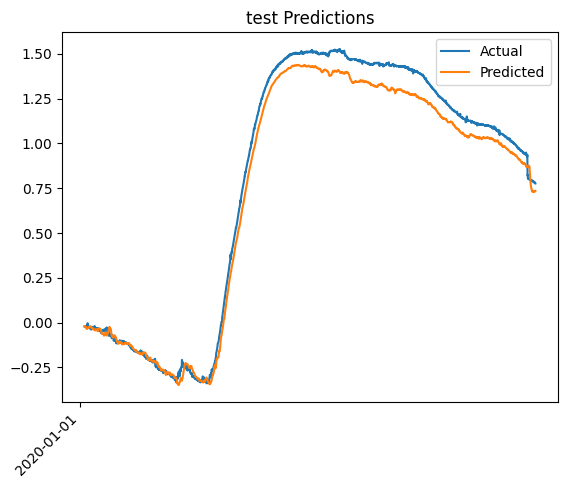

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\perso\anaconda3\envs\MeselheResearch\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\perso\AppData\Local\Temp\ipykernel_21932\1248374117.py", line 1, in <module>
    predict.plot_predicts("test", predicts, testY, test_dates)
  File "c:\Users\perso\Documents\GitHub\Hysterisis-ML-Modeling\lib\predict.py", line 35, in plot_predicts
    plt.savefig(f".\\model_results\\{model_name}\\{model_name}_predictions.png")
  File "c:\Users\perso\anaconda3\envs\MeselheResearch\lib\site-packages\matplotlib\pyplot.py", line 1023, in savefig
    res = fig.savefig(*args, **kwargs)
  File "c:\Users\perso\anaconda3\envs\MeselheResearch\lib\site-packages\matplotlib\figure.py", line 3343, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "c:\Users\perso\anaconda3\envs\MeselheResearch\lib\site-packages\matplotlib\backend_bases.py", line 2366, in pr

<Figure size 640x480 with 0 Axes>

In [ ]:

predict.plot_predicts("test", predicts, testY, test_dates)


In [60]:
shape = test_dates.shape[0] if predicts.shape[0] > test_dates.shape[0] else predicts.shape[0]


# Add dates to the sets
testY = pd.DataFrame(testY, index= test_range[:shape])
testY.index = pd.to_datetime(testY.index)

In [ ]:


'''
model_names = ['Basic_LSTM', 'Stacked_LSTM', 'Bidirectional_LSTM', 'Attention_LSTM']
for model_name in model_names:
    model, history = models.prebuilt_models(model_name, trainX, trainY)
    validation_loss = models.evaluate_model(model, testX, testY)
    models.plot_model(history, model_name, validation_loss)
'''

